In [195]:
import numpy as np
import pandas as pd
import scipy.stats as stats

In [196]:
data = pd.read_csv('../data/homepage-experiment-data.csv')
data.head(10)

,Day,Control Cookies,Control Downloads,Control Licenses,Experiment Cookies,Experiment Downloads,Experiment Licenses
0,1,1764,246,1,1850,339,3
1,2,1541,234,2,1590,281,2
2,3,1457,240,1,1515,274,1
3,4,1587,224,1,1541,284,2
4,5,1606,253,2,1643,292,3
5,6,1681,287,3,1780,299,3
6,7,1534,262,5,1555,276,8
7,8,1798,331,12,1787,326,20
8,9,1478,223,30,1553,298,38
9,10,1461,236,32,1458,289,23


### Downloads Rate

In [197]:
data['cdr'] = \
    data['Control Downloads'] / data['Control Cookies'] 

data['edr'] = \
    data['Experiment Downloads'] / data['Experiment Cookies']

In [198]:
# Compute download rate for control records
control_ctr = data['cdr'].mean()

control_ctr

0.16110817914523748

In [199]:
# Compute download rate for experiment records
experiment_ctr = data['edr'].mean()

experiment_ctr

0.18069306246883612

In [200]:
# Compute observed difference in download rates
obs_diff = experiment_ctr - control_ctr

obs_diff

0.019584883323598645

In [201]:
# Create sampling distribution for difference in download rates
# with boostrapping
diffs = []
for _ in range(10000):
    b_samp = data.sample(n=data.shape[0], replace=True) # bootstrap
    control_mean = b_samp['cdr'].mean()
    experiment_mean = b_samp['edr'].mean()
    diffs.append(experiment_mean - control_mean)

(array([  12.,  108.,  529., 1559., 2639., 2708., 1708.,  608.,  114.,
          15.]),
 array([0.01037891, 0.01221135, 0.01404378, 0.01587622, 0.01770865,
        0.01954109, 0.02137352, 0.02320596, 0.02503839, 0.02687083,
        0.02870326]),
 <a list of 10 Patch objects>)

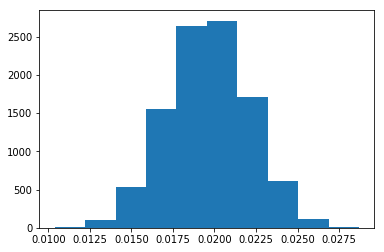

In [202]:
diffs = np.array(diffs)

# Plot sampling distribution
plt.hist(diffs)

In [203]:
null_vals = np.random.normal(0, diffs.std(), diffs.size)

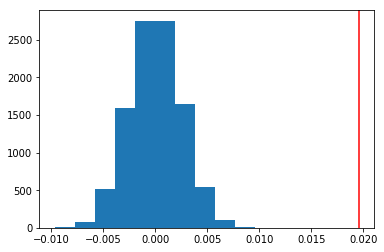

In [204]:
# plot null distribution
plt.hist(null_vals);

# plot line for observed statistic
plt.axvline(obs_diff, c='red');

In [205]:
# compute p value
(null_vals > obs_diff).mean()

0.0

### Licenses Rate

In [220]:
clr = \
    data[data['Day']>7]['Control Licenses'].values \
    / data[data['Day']>7]['Control Cookies'].values 

elr = \
    data[data['Day']>7]['Experiment Licenses'].values \
    / data[data['Day']>7]['Experiment Cookies'].values

data2 = pd.DataFrame(data={'clr': clr, 'elr': elr})

data2

,clr,elr
0,0.006674,0.011192
1,0.020298,0.024469
2,0.021903,0.015775
3,0.023681,0.023151
4,0.015043,0.021698
5,0.017647,0.017847
6,0.020983,0.019148
7,0.018112,0.018028
8,0.021189,0.018057
9,0.020343,0.023211


In [221]:
# Compute purchase rate for control records
control_ctr2 = data_sub['clr'].mean()

control_ctr2

0.019673905109840614

In [222]:
# Compute purchase rate for experiment records
experiment_ctr2 = data_sub['elr'].mean()

experiment_ctr2

0.01973293497473413

In [223]:
# Compute observed difference in purchase rates
obs_diff2 = experiment_ctr2 - control_ctr2

obs_diff2

5.9029864893516554e-05

In [224]:
# Create sampling distribution for difference in purchase rates
# with boostrapping
diffs2 = []
for _ in range(10000):
    b_samp = data2.sample(n=data2.shape[0], replace=True) # bootstrap
    control_mean = b_samp['clr'].mean()
    experiment_mean = b_samp['elr'].mean()
    diffs2.append(experiment_mean - control_mean)

(array([  11.,   81.,  396., 1229., 2480., 2804., 1941.,  857.,  172.,
          29.]),
 array([-0.00306243, -0.00242394, -0.00178545, -0.00114696, -0.00050847,
         0.00013002,  0.00076852,  0.00140701,  0.0020455 ,  0.00268399,
         0.00332248]),
 <a list of 10 Patch objects>)

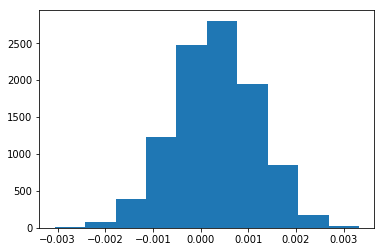

In [225]:
diffs2 = np.array(diffs2)

# Plot sampling distribution
plt.hist(diffs2)

In [226]:
null_vals2 = np.random.normal(0, diffs2.std(), diffs2.size)

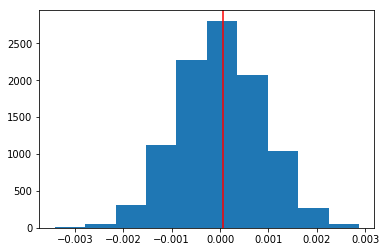

In [227]:
# plot null distribution
plt.hist(null_vals2);

# plot line for observed statistic
plt.axvline(obs_diff2, c='red');

In [228]:
# compute p value
(null_vals2 > obs_diff2).mean()

0.4721